# The Pol-InSAR course - May 02, 2022 
# Synthetic Aperture Radar (SAR) 
# Part 1: Range Resolution

In [6]:
# --- To get started, we set the ipympl backend, which makes matplotlib plots interactive.
# --- We do this using a magic command, starting with %.
%matplotlib widget

# --- import libraries
import sys
sys.path.append('/projects/src/')

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift, ifft

# --- import rat class
from ste_io import *

# --- Useful functions

def rect(t, T0):
    # Implements y = rect(t/T0) = 1 if abs(t/T0) <= 0.5, 0 otherwise 
    # All input / outputs are Numpy arrays
    
    N = t.shape[0]
    y = np.zeros(N, 'float32') 
    y[np.abs(t/T0) <= 0.5] = 1
    
    return y

# --- Constants

# speed of light
c0 = 2.9972190e+08


## Exercise 1

The typical P-band chirp transmitted by the F-SAR system is characterized by the following input parameters:

In [7]:
# --- Input parameters

# chirp duration, s
T = 1.0016000e-05
# chirp bandwidth, Hz
Wr = 50.0e6

In the focusing process, the following parameters are chosen for ther ange axis:

In [8]:
# number of samples in range
Ns = 3772
# range sampling, m
rs = 1.1988876

1. Calculate and plot the chirp signal;
2. Generate the impulse responde of the matched filter;
3. Calculate and plot the output (convolution) of the matched filter with the chirp as input. 

### Solution

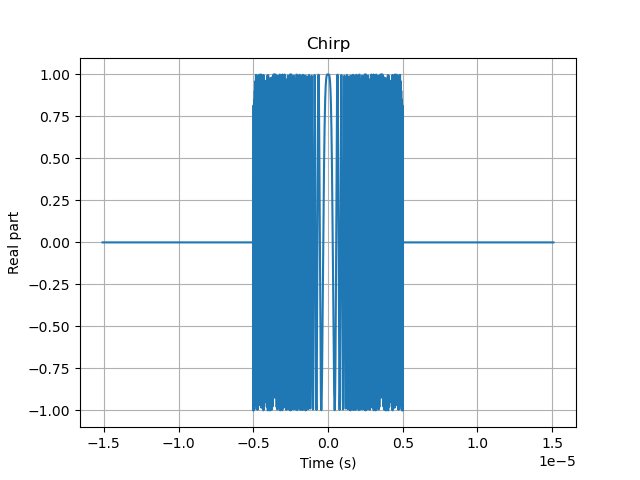

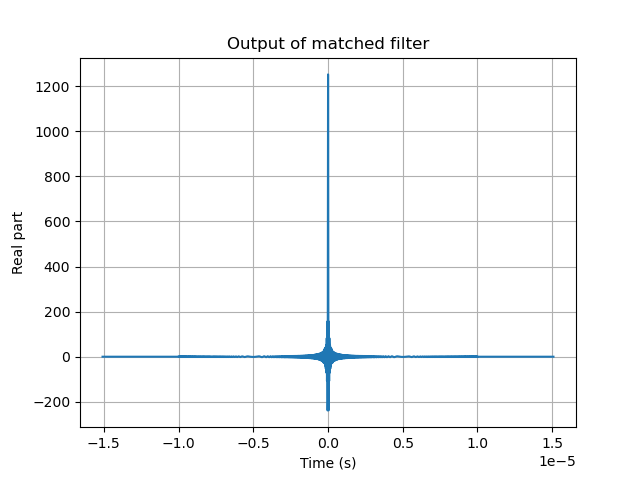

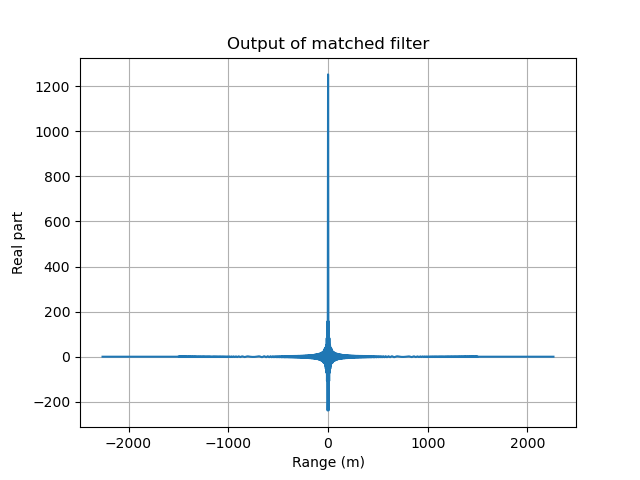

In [10]:
# create time axis
range_axis = np.linspace(0, Ns-1, Ns) * rs
range_axis = range_axis - np.max(range_axis)/2
# from range to time
time = range_axis * 2/c0

# generation of chirp
kr = Wr / T
s0_t = np.exp(1j * np.pi * kr * time**2) * rect(time, T)

# plot chirp
plt.figure()
plt.plot(time, np.real(s0_t))
plt.xlabel('Time (s)')
plt.ylabel('Real part')
plt.title('Chirp')
plt.grid()

# generation of matched filter
h0_t = np.conj(s0_t[::-1])

# calculate the output
u0_t = np.convolve(s0_t, h0_t, 'same')

# plot output
plt.figure()
plt.plot(time, np.real(u0_t))
plt.xlabel('Time (s)')
plt.ylabel('Real part')
plt.title('Output of matched filter')
plt.grid()

# plot output ... as a function of range
plt.figure()
plt.plot(range_axis, np.real(u0_t))
plt.xlabel('Range (m)')
plt.ylabel('Real part')
plt.title('Output of matched filter')
plt.grid()



In [7]:
print(str(c0/2/Wr) + ' m vs ' + str(c0*T/2))

2.997219 m vs 1501.0072752


## Exercise 2

The files */projects/data/01-sar/signal1_rc.npy* and */projects/data/01-sar/signal2_rc.npy* contain the received signals along two range lines originated by the same range chirp and sampled with the same parameters as in Exercise 1.

1. Open the files (use np.load);
2. Plot the real part of the signals;
3. Focus in range by using a matched filter;
4. ... how many scatterers do you see in the two cases? and at which range?

### Solution

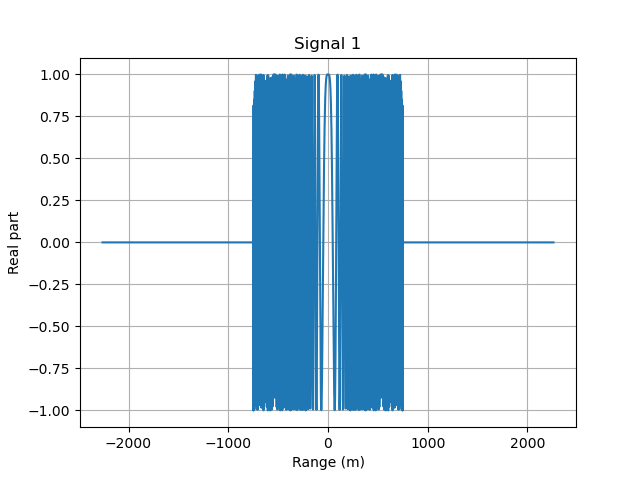

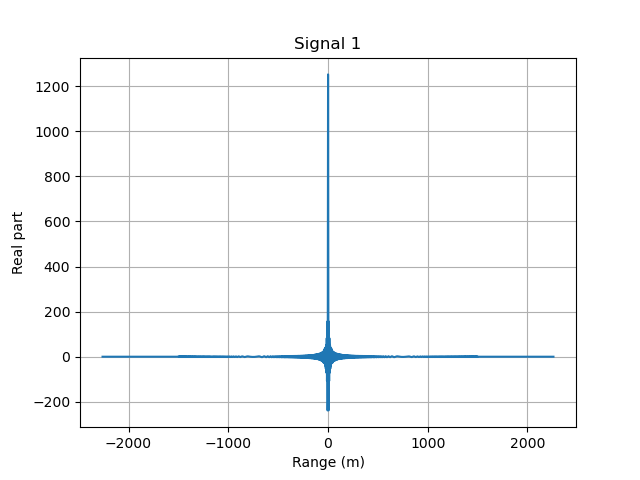

In [11]:
# open signal 1
s1_t = np.load('/projects/data/01-sar/signal1_rc.npy')

# calculate the output
u1_t = np.convolve(s1_t, h0_t, 'same')

# plot signal 1... as a function of range
plt.figure()
plt.plot(range_axis, np.real(s1_t))
plt.xlabel('Range (m)')
plt.ylabel('Real part')
plt.title('Signal 1')
plt.grid()

# plot output 1... as a function of range
plt.figure()
plt.plot(range_axis, np.real(u1_t))
plt.xlabel('Range (m)')
plt.ylabel('Real part')
plt.title('Signal 1')
plt.grid()



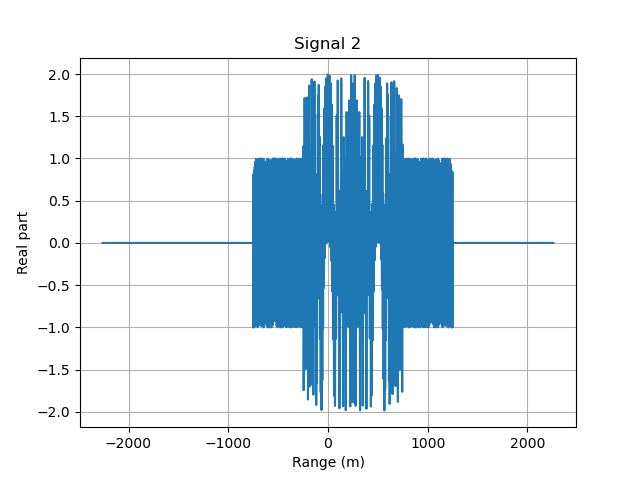

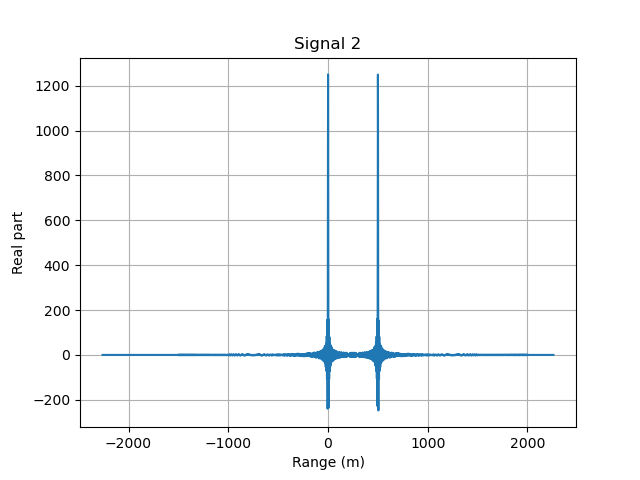

In [12]:
# open signal 2
s2_t = np.load('/projects/data/01-sar/signal2_rc.npy')

# calculate the output
u2_t = np.convolve(s2_t, h0_t, 'same')

# plot signal 2... as a function of range
plt.figure()
plt.plot(range_axis, np.real(s2_t))
plt.xlabel('Range (m)')
plt.ylabel('Real part')
plt.title('Signal 2')
plt.grid()

# plot output 2... as a function of range
plt.figure()
plt.plot(range_axis, np.real(u2_t))
plt.xlabel('Range (m)')
plt.ylabel('Real part')
plt.title('Signal 2')
plt.grid()

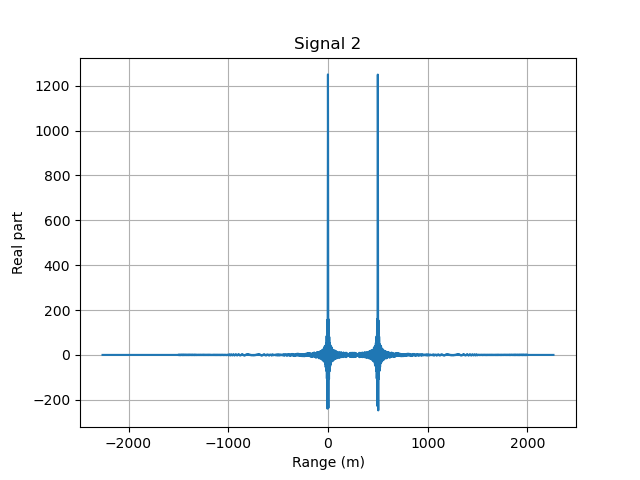

In [13]:
# focus signal 2 with fft
u2_fft = fft(s2_t) * fft(h0_t)
u2_fft_t = fftshift( ifft(u2_fft) )

# plot output 2... as a function of range
plt.figure()
plt.plot(range_axis, np.real(u2_fft_t))
plt.xlabel('Range (m)')
plt.ylabel('Real part')
plt.title('Signal 2')
plt.grid()

## Exercise 3

We are ready now to focus real F-SAR P-band data !

1. Open the raw data image in the file */projects/data/01-sar/raw-img.rat*, and visualize it (only the amplitude).
2. Compress it in range using the same chirp as in the Exercise 1, this time using the Fourier transform. What do you see?

Tip:
Use the provided rat class to open the data - Example: img = rrat(*filename.rat*)

### Solution

In [8]:
img = rrat('/projects/data/01-sar/raw-img.rat')
img.shape

(9984, 3772)

Text(0.5, 1.0, 'Raw data')

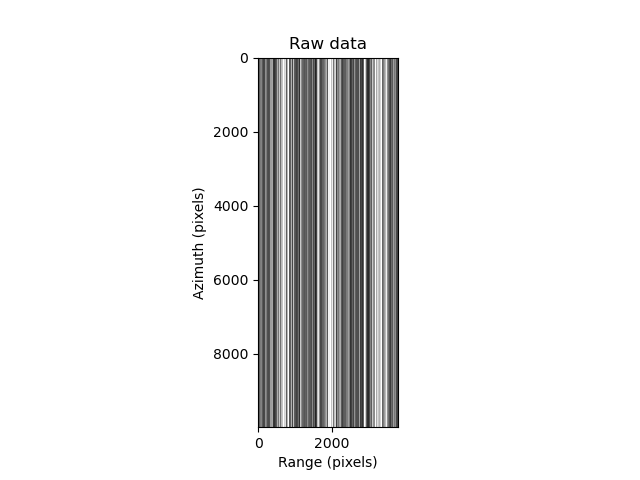

In [11]:
plt.figure()
plt.imshow(np.flipud(abs(img)), vmin = 0, vmax = 2*np.mean(abs(img)), cmap = 'gray') #, interpolation = 'nearest')
plt.xlabel('Range (pixels)')
plt.ylabel('Azimuth (pixels)')
plt.title('Raw data')

Text(0.5, 1.0, 'After range focusing')

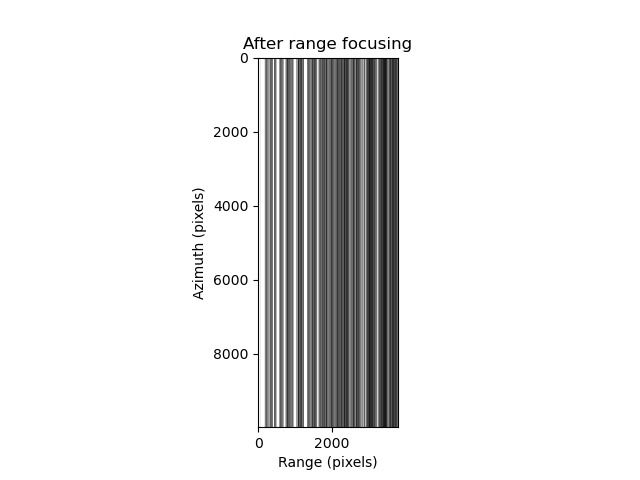

In [12]:
img_r = np.zeros(img.shape, 'complex64')

for nn in range(img.shape[0]) :
    
    u_fft = fft(img[nn, :]) * fft(h0_t)
    img_r[nn, :] = fftshift( ifft(u_fft) )
    
plt.figure()
plt.imshow(np.flipud(abs(img_r)), vmin = 0, vmax = 2*np.mean(abs(img_r)), cmap = 'gray')#, interpolation = 'nearest')
plt.xlabel('Range (pixels)')
plt.ylabel('Azimuth (pixels)')
plt.title('After range focusing')
    